In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Drop unnecessary columns (those are specific to the patient)
unnecessary = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood']
df.drop(unnecessary, axis=1, inplace=True)
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [11]:
# rename the No-show column for better understand
df=df.rename(columns={'No-show':'Showed'})

In [12]:
df['Showed'] = df['Showed'].replace('No','1')
df['Showed'] = df['Showed'].replace('Yes','0')
df['Gender'] = df['Gender'].replace('M','0')
df['Gender'] = df['Gender'].replace('F','1')
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,1,62,0,1,0,0,0,0,1
1,0,56,0,0,0,0,0,0,1
2,1,62,0,0,0,0,0,0,1
3,1,8,0,0,0,0,0,0,1
4,1,56,0,1,1,0,0,0,1


In [13]:
df.query('Age==-1')

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
99832,1,-1,0,0,0,0,0,0,1


In [14]:
# removing impossible age
df.drop(index=99832,inplace=True)

In [15]:
df['Showed']=df['Showed'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110526 non-null  object
 1   Age           110526 non-null  int64 
 2   Scholarship   110526 non-null  int64 
 3   Hipertension  110526 non-null  int64 
 4   Diabetes      110526 non-null  int64 
 5   Alcoholism    110526 non-null  int64 
 6   Handcap       110526 non-null  int64 
 7   SMS_received  110526 non-null  int64 
 8   Showed        110526 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 8.4+ MB


In [17]:
# Show the shape (rows,columns)
df.shape

(110526, 9)

In [18]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [19]:
x.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,1,62,0,1,0,0,0,0
1,0,56,0,0,0,0,0,0
2,1,62,0,0,0,0,0,0
3,1,8,0,0,0,0,0,0
4,1,56,0,1,1,0,0,0


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Showed, dtype: int64

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

      Gender  Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
16468      0   12            0             0         0           0        0   
60681      1   38            0             0         0           0        0   
37882      1   27            1             1         0           0        0   
92235      1    2            0             0         0           0        0   
48360      0    2            0             0         0           0        0   
...      ...  ...          ...           ...       ...         ...      ...   
21243      1   11            1             0         0           0        0   
45891      1   85            0             1         0           0        0   
42613      0    0            0             0         0           0        0   
43567      0    4            0             0         0           0        0   
68268      1   47            0             1         1           0        0   

       SMS_received  
16468             0  
60681  

In [22]:
x_train.shape

(82894, 8)

In [23]:
x_test.shape

(27632, 8)

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)
print(x_test)

[[-1.36707722 -1.08666738 -0.33021032 ... -0.17753947 -0.13771805
  -0.68816155]
 [ 0.73148758  0.03917217 -0.33021032 ... -0.17753947 -0.13771805
  -0.68816155]
 [ 0.73148758 -0.43714456  3.02837299 ... -0.17753947 -0.13771805
  -0.68816155]
 ...
 [-1.36707722 -1.60628563 -0.33021032 ... -0.17753947 -0.13771805
   1.45314715]
 [-1.36707722 -1.43307955 -0.33021032 ... -0.17753947 -0.13771805
  -0.68816155]
 [ 0.73148758  0.42888586 -0.33021032 ... -0.17753947 -0.13771805
  -0.68816155]]
[[ 0.73148758 -0.56704913 -0.33021032 ... -0.17753947  6.04311594
  -0.68816155]
 [ 0.73148758  0.99180563 -0.33021032 ... -0.17753947 -0.13771805
  -0.68816155]
 [ 0.73148758  0.94850411 -0.33021032 ... -0.17753947 -0.13771805
  -0.68816155]
 ...
 [-1.36707722  1.85783605 -0.33021032 ... -0.17753947 -0.13771805
   1.45314715]
 [ 0.73148758 -1.56298411 -0.33021032 ... -0.17753947 -0.13771805
   1.45314715]
 [-1.36707722  0.86190107 -0.33021032 ... -0.17753947 -0.13771805
   1.45314715]]


In [25]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [27]:
# Predicting the Test set results
y_predict= classifier.predict(x_test)


In [29]:
print(y_predict)

[1 1 1 ... 1 1 1]


In [30]:
from sklearn import metrics
print('Accuracy Score')
print(metrics.accuracy_score(y_test,y_predict))

Accuracy Score
0.8012087434858135


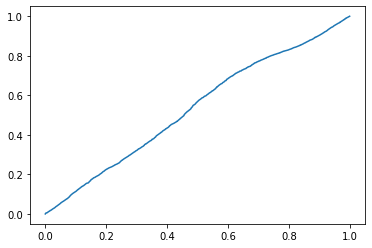

In [38]:
# ROC curve
from sklearn.metrics import roc_curve, auc

y_predict_roc= classifier.decision_function(x_test)

svm_fpr, svm_tpr, threshold = roc_curve(y_test,y_predict_roc)
auc_svm = auc(svm_fpr, svm_tpr)


plt.plot(svm_fpr, svm_tpr)
plt.show()

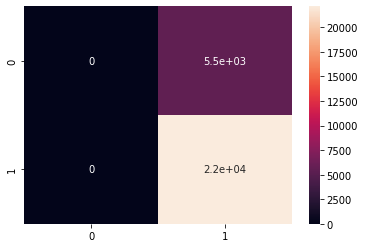

In [42]:
# confusion matrix visulization
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_predict, labels=classifier.classes_)

# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

In [44]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5493
           1       0.80      1.00      0.89     22139

    accuracy                           0.80     27632
   macro avg       0.40      0.50      0.44     27632
weighted avg       0.64      0.80      0.71     27632



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
